# Insurance Claims- Fraud Detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
# for interactive visualizations




import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insaurance _claim_fraud.csv')

pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#checking shape
df.shape

(1000, 40)

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df=df.replace('?',np.NaN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [8]:
#we will replace ? by the most common collision type as we are unware of the type

df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

df['property_damage'].fillna('NO',inplace=True)


df['police_report_available'].fillna('NO',inplace=True)


df.isnull().any().any()

True

# data Visualization

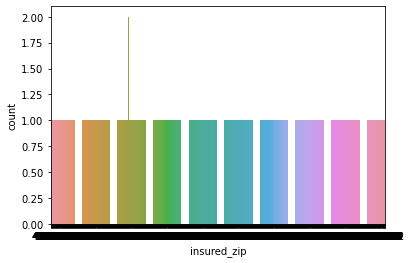

In [9]:
sns.countplot(x='insured_zip',data=df)

In [10]:
df['insured_sex']=df['insured_sex'].map({'MALE':1,'FEMALE':0})

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,1,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,1,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,0,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,0,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [12]:
df['fraud_reported']=df['fraud_reported'].map({'Y':1,'N':0})

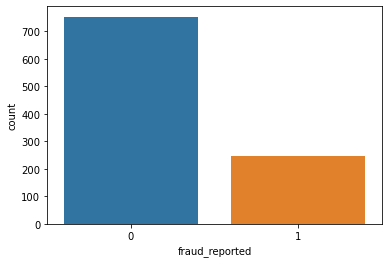

In [13]:
sns.countplot(x='fraud_reported',data=df)

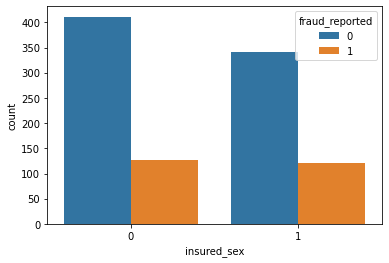

In [14]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

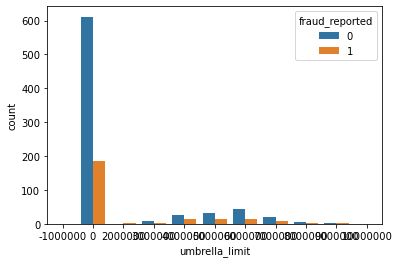

In [15]:
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=df)

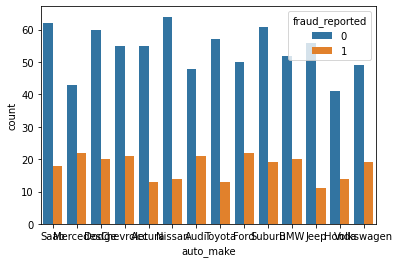

In [16]:
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

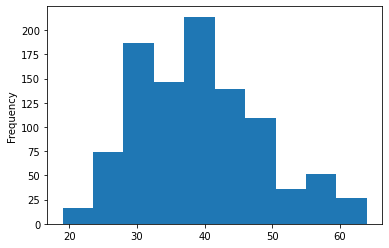

In [17]:
df['age'].plot.hist()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

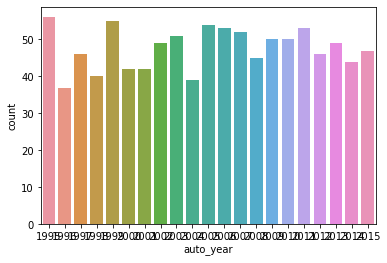

In [19]:
sns.countplot(x='auto_year',data=df)

In [20]:
l1=list()
l2=list()
for i in df['policy_csl']:
    l1.append(i.split('/')[0])
    l2.append(i.split('/')[1])

In [21]:
df['csl1']=l1
df['csl2']=l2


In [22]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,csl1,csl2
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,0.0,1000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,NaN,7,14,20,6,NaN,NaN,60,4,3,4,5,7,7,1000,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,14,39,NaN,NaN,NaN,3,3
top,NaN,NaN,NaN,28-04-1992,OH,250/500,NaN,NaN,NaN,NaN,NaN,JD,machine-op-inspct,reading,own-child,NaN,NaN,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,4981 Flute Hwy,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,NaN,NaN,250,500
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,NaN,161,93,64,183,NaN,NaN,28,419,470,354,292,262,157,1,NaN,NaN,698,NaN,NaN,686,NaN,NaN,NaN,NaN,80,43,NaN,NaN,NaN,351,351
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000,NaN,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483,NaN,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000,NaN,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000,NaN,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000,NaN,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000,NaN,NaN,NaN


In [23]:
df.drop(['policy_csl'],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,csl1,csl2
0,328,48,521585,17-10-2014,OH,1000,1406.91,0,466132,1,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN,250,500
1,228,42,342868,27-06-2006,IN,2000,1197.22,5000000,468176,1,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,NaN,250,500
2,134,29,687698,06-09-2000,OH,2000,1413.14,5000000,430632,0,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN,100,300
3,256,41,227811,25-05-1990,IL,2000,1415.74,6000000,608117,0,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN,250,500
4,228,44,367455,06-06-2014,IL,1000,1583.91,6000000,610706,1,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN,500,1000


In [24]:
len(df.columns.values)
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [28]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,csl1,csl2
0,328,48,521585,17-10-2014,OH,1000,1406.91,0,466132,1,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN,250,500
1,228,42,342868,27-06-2006,IN,2000,1197.22,5000000,468176,1,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,NaN,250,500
2,134,29,687698,06-09-2000,OH,2000,1413.14,5000000,430632,0,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN,100,300
3,256,41,227811,25-05-1990,IL,2000,1415.74,6000000,608117,0,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN,250,500
4,228,44,367455,06-06-2014,IL,1000,1583.91,6000000,610706,1,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN,500,1000
5,256,39,104594,12-10-2006,OH,1000,1351.10,0,478456,0,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,NaN,250,500
6,137,34,413978,04-06-2000,IN,1000,1333.35,0,441716,1,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NO,0,0,NO,78650,21450,7150,50050,Nissan,Pathfinder,2012,0,NaN,250,500
7,165,37,429027,03-02-1990,IL,1000,1137.03,0,603195,1,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NO,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,0,NaN,100,300
8,27,33,485665,05-02-1997,IL,500,1442.99,0,601734,0,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,0,NaN,100,300
9,212,42,636550,25-07-2011,IL,500,1315.68,0,600983,1,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,NO,42300,4700,4700,32900,Saab,92x,1996,0,NaN,100,300


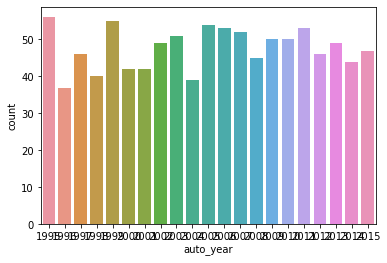

In [27]:
sns.countplot(x='auto_year',data=df)

In [29]:
df.shape

(1000, 41)

In [30]:
df.drop(['auto_year'],axis=1,inplace=True)
df.shape

(1000, 40)

In [31]:
df.insured_hobbies.value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [32]:
df.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [33]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl1', 'csl2'],
      dtype='object')

In [34]:
df.columns.values

array(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'fraud_reported',
       '_c39', 'csl1', 'csl2'], dtype=object)

In [36]:
df_with_dummies=pd.get_dummies(df[['policy_state', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl1', 'csl2']],drop_first=True)

In [37]:
df_with_dummies.head()

,policy_state_IN,policy_state_OH,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_date_01-02-2015,incident_date_01-03-2015,incident_date_02-01-2015,incident_date_02-02-2015,incident_date_03-01-2015,incident_date_03-02-2015,incident_date_04-01-2015,incident_date_04-02-2015,incident_date_05-01-2015,incident_date_05-02-2015,incident_date_06-01-2015,incident_date_06-02-2015,incident_date_07-01-2015,incident_date_07-02-2015,incident_date_08-01-2015,incident_date_08-02-2015,incident_date_09-01-2015,incident_date_09-02-2015,incident_date_10-01-2015,incident_date_10-02-2015,incident_date_11-01-2015,incident_date_11-02-2015,incident_date_12-01-2015,incident_date_12-02-2015,incident_date_13-01-2015,incident_date_13-02-2015,incident_date_14-01-2015,incident_date_14-02-2015,incident_date_15-01-2015,incident_date_15-02-2015,incident_date_16-01-2015,incident_date_16-02-2015,incident_date_17-01-2015,incident_date_17-02-2015,incident_date_18-01-2015,incident_date_18-02-2015,incident_date_19-01-2015,incident_date_19-02-2015,incident_date_20-01-2015,incident_date_20-02-2015,incident_date_21-01-2015,incident_date_21-02-2015,incident_date_22-01-2015,incident_date_22-02-2015,incident_date_23-01-2015,incident_date_23-02-2015,incident_date_24-01-2015,incident_date_24-02-2015,incident_date_25-01-2015,incident_date_25-02-2015,incident_date_26-01-2015,incident_date_26-02-2015,incident_date_27-01-2015,incident_date_27-02-2015,incident_date_28-01-2015,incident_date_28-02-2015,incident_date_29-01-2015,incident_date_30-01-2015,incident_date_31-01-2015,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_location_1028 Sky Lane,incident_location_1030 Pine Lane,incident_location_1087 Flute Drive,incident_location_1091 1st Drive,incident_location_1102 Apache Hwy,incident_location_1110 4th Drive,incident_location_1123 5th Lane,incident_location_1126 Texas Hwy,incident_location_1128 Maple Lane,incident_location_1133 Apache St,incident_location_1135 Solo Lane,incident_location_1173 Andromedia Ave,incident_location_1186 Rock St,incident_location_1213 4th Lane,incident_location_1215 Pine Hwy,incident_location_1218 Sky Hwy,incident_location_1220 MLK Ave,incident_location_1229 5th Ave,incident_location_1240 Tree Lane,incid

In [40]:
df1=df.select_dtypes(include=['int64','float32'])
df1.head()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,521585,1000,0,466132,1,53300,0,5,1,1,2,71610,6510,13020,52080,1
1,228,42,342868,2000,5000000,468176,1,0,0,8,1,0,0,5070,780,780,3510,1
2,134,29,687698,2000,5000000,430632,0,35100,0,7,3,2,3,34650,7700,3850,23100,0
3,256,41,227811,2000,6000000,608117,0,48900,-62400,5,1,1,2,63400,6340,6340,50720,1
4,228,44,367455,1000,6000000,610706,1,66000,-46000,20,1,0,1,6500,1300,650,4550,0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
sc=StandardScaler()
y=df1['fraud_reported']
x=df1.drop(['fraud_reported'],axis=1)
x_scaled=sc.fit_transform(x)

In [44]:
x_scaled

array([[ 1.07813958,  0.99083647, -0.09595307, ..., -0.18928317,
         1.16550497,  0.74965272],
       [ 0.2089946 ,  0.33407345, -0.79152739, ..., -1.36382194,
        -1.37269599, -1.82334593],
       [-0.60800168, -1.08891308,  0.55056594, ...,  0.05464372,
        -0.73607206, -0.78556451],
       ...,
       [-0.64276748, -0.54161057,  1.44891961, ...,  0.01364761,
         0.0208261 ,  0.77190224],
       [ 2.20802805,  2.52328351, -0.04786687, ..., -0.45370813,
        -0.45197603, -0.07357971],
       [ 2.19064515,  2.3043625 ,  0.03830297, ..., -1.42941572,
        -1.34366428, -1.81434017]])

In [46]:
df_with_dummies=df_with_dummies.join(df[['months_as_customer', 'age', 'umbrella_limit', 'insured_sex',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'fraud_reported']])

In [47]:
df_with_dummies.columns.values

array(['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College', ..., 'bodily_injuries',
       'witnesses', 'fraud_reported'], dtype=object)

In [53]:
df_inputs=df_with_dummies[['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
       'insured_hobbies_paintball', 'insured_hobbies_polo',
       'insured_hobbies_reading', 'insured_hobbies_skydiving',
       'insured_hobbies_sleeping', 'insured_hobbies_video-games',
       'insured_hobbies_yachting', 'insured_relationship_not-in-family',
       'insured_relationship_other-relative',
       'insured_relationship_own-child', 'insured_relationship_unmarried',
       'insured_relationship_wife', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 
       'collision_type_Rear Collision', 'collision_type_Side Collision',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police', 'incident_state_NY',
       'incident_state_OH', 'incident_state_PA', 'incident_state_SC',
       'incident_state_VA', 'incident_state_WV', 'incident_city_Columbus',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Riverwood',
       'incident_city_Springfield', 
       'property_damage_YES', 
       'police_report_available_YES', 'auto_make_Audi', 'auto_make_BMW',
       'auto_make_Chevrolet', 'auto_make_Dodge', 'auto_make_Ford',
       'auto_make_Honda', 'auto_make_Jeep', 'auto_make_Mercedes',
       'auto_make_Nissan', 'auto_make_Saab', 'auto_make_Suburu',
       'auto_make_Toyota', 'auto_make_Volkswagen', 'csl1_250', 'csl1_500',
       'csl2_300', 'csl2_500', 'months_as_customer', 'age',
       'umbrella_limit', 'insured_sex', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses' ]]

In [54]:
df_target=df_with_dummies['fraud_reported']

In [56]:
sc1=StandardScaler()
X=sc1.fit_transform(df_inputs)

In [57]:
lr=LogisticRegression()
lr.fit(X,df_target)

LogisticRegression()

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,df_target,test_size=0.2,random_state=2)

In [60]:
lr1=LogisticRegression()
lr1.fit(x_train,y_train)

LogisticRegression()

In [61]:
pered=lr1.predict(x_test)

In [62]:
from sklearn.metrics import classification_report


In [64]:
classification_report(y_test,pered)

'              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.91       151\n           1       0.71      0.73      0.72        49\n\n    accuracy                           0.86       200\n   macro avg       0.81      0.82      0.81       200\nweighted avg       0.86      0.86      0.86       200\n'

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test,pered)

array([[136,  15],
       [ 13,  36]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,pered)*100

86.0

SUPPORT VECTOR CLASSIFIER

In [69]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.785
[[146   5]
 [ 38  11]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       151
           1       0.69      0.22      0.34        49

    accuracy                           0.79       200
   macro avg       0.74      0.60      0.61       200
weighted avg       0.77      0.79      0.74       200



RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators
                          =100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.79
[[149   2]
 [ 40   9]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       151
           1       0.82      0.18      0.30        49

    accuracy                           0.79       200
   macro avg       0.80      0.59      0.59       200
weighted avg       0.80      0.79      0.74       200



AdaBoostClassifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.78
[[135  16]
 [ 28  21]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.57      0.43      0.49        49

    accuracy                           0.78       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.76      0.78      0.77       200



In [72]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.71
[[110  41]
 [ 17  32]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       151
           1       0.44      0.65      0.52        49

    accuracy                           0.71       200
   macro avg       0.65      0.69      0.66       200
weighted avg       0.76      0.71      0.73       200



In [73]:
# The score is high so could be result in overfitting, which we’re actually trying to avoid! 
# This is where cross validation comes in use.

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.745 0.735 0.705 0.745 0.75 ]
0.736


In [76]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.73  0.655 0.545 0.73  0.695]
0.671


In [77]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())

[0.75  0.755 0.74  0.755 0.755]
0.751


In [78]:
score=cross_val_score(sv
                      ,x,y,cv=5)
print(score)
print(score.mean())

[0.75  0.75  0.755 0.755 0.755]
0.7529999999999999


In [79]:
import joblib
joblib.dump(sv,"Insurance.obj")

['Insurance.obj']

In [80]:
backfile=joblib.load("Insurance.obj")
backfile.predict(x_train)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [81]:
model=[lr,sv,gnb,rf,ad]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score :',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy score : LogisticRegression()
0.86
[[136  15]
 [ 13  36]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       151
           1       0.71      0.73      0.72        49

    accuracy                           0.86       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.86      0.86      0.86       200

[0.75  0.755 0.74  0.755 0.755]
0.751
accuracy score : SVC()
0.785
[[146   5]
 [ 38  11]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       151
           1       0.69      0.22      0.34        49

    accuracy                           0.79       200
   macro avg       0.74      0.60      0.61       200
weighted avg       0.77      0.79      0.74       200

[0.75  0.75  0.755 0.755 0.755]
0.7529999999999999
accuracy score : GaussianNB()
0.71
[[110  41]
 [ 17  32]]
              precision    recall  f1-score   support

           0       0.87   